# Système de recommendation de livres

## Problématique

L'utilisateur doit être en mesure d'avoir des recommendations de livres en fonction du dernier livre lu

**Imports et chargement de la donnée**

In [1]:
%pip install numpy==1.21.4
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_books = pd.read_csv('books_1.Best_Books_Ever.csv')

## Description de la donnée

### Provenance de la donnée
La donnée a été récupérée sur le site [Zenodo](https://zenodo.org/record/4265096#.YyLmDexBw-R).
Le jeu de données a été collecté dans le cadre des sujets Tipologie et cycle de vie des données du master en science des données de l'Université Oberta de Catalunya (UOC).

L'ensemble de données contient 25 variables et 52478 enregistrements correspondant aux livres de la liste GoodReads Best Books Ever (la plus grande liste du site).

Les données ont été récupérées en deux ensembles, les 30000 premiers livres et les 22478 restants. Les dates n'ont pas été analysées et reformatées dans le deuxième ensemble, ainsi publishDate et firstPublishDate sont représentés dans un format mm/dd/yyyy pour les 30000 premiers enregistrements et mois/jour/année pour le reste.

Les images de la couverture du livre peuvent être téléchargées à partir de l'url dans le champ "coverImg". 

Les 25 champs de l'ensemble de données sont :

| Attributes  | Definition | Completeness |
| ------------- | ------------- | ------------- | 
| bookId  | Book Identifier as in goodreads.com  | 100 |
| title  | Book title | 100 |
| series | Series Name | 45 |
| author | Book's Author | 100 |
| rating | Global goodreads rating | 100 |
| description | Book's description | 97 |
| language | Book's language | 93 |
| isbn | Book's ISBN | 92 |
| genres | Book's genres | 91 |
| characters | Main characters | 26 |
| bookFormat | Type of binding | 97 |
| edition | Type of edition (ex. Anniversary Edition) | 9 |
| pages | Number of pages | 96 |
| publisher | Editorial | 93 |
| publishDate | publication date | 98 |
| firstPublishDate | Publication date of first edition | 59 |
| awards | List of awards | 20 |
| numRatings | Number of total ratings | 100 |
| ratingsByStars | Number of ratings by stars | 97 |
| likedPercent | Derived field, percent of ratings over 2 starts (as in GoodReads) | 99 |
| setting | Story setting | 22 |
| coverImg | URL to cover image | 99 |
| bbeScore | Score in Best Books Ever list | 100 |
| bbeVotes | Number of votes in Best Books Ever list | 100 |
| price | Book's price (extracted from Iberlibro) | 73 |

In [3]:
df_books.isnull().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [4]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

## Data Viz & Preprocessing

In [5]:
# Dropping columns with too much missing values
df = df_books.copy()
df = df.drop(['series', 'edition', 'firstPublishDate', 'price', 'publisher', 'bbeScore', 'bbeVotes', 'setting', 'awards'], axis=1)
df['author'] = df['author'].str.split(',').str[0]
def remove_dup(dataframe):
    org_df = dataframe.drop_duplicates()
    return org_df

#using the fxn to remove duplicates
def clean_data(dataframe):
    a = remove_dup(dataframe) 
    a = a.dropna(how = 'all') #drop the records that have ALL na values
    a = a.dropna(axis=1, how='all') #drop the columns that have ALL na values
    return a

In [6]:
df = clean_data(df)
df_top_20 = df[df['numRatings'] > 1000000]
df_top_20 = df_top_20.sort_values(by='rating', ascending=False)
df_top_20.head()

,bookId,title,author,rating,description,language,isbn,genres,characters,bookFormat,pages,publishDate,numRatings,ratingsByStars,likedPercent,coverImg
71,136251.Harry_Potter_and_the_Deathly_Hallows,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,Harry Potter is leaving Privet Drive for the l...,English,9780545010221,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Hardcover,759,07/21/07,2811637,"['2038930', '552014', '161906', '35042', '23745']",98.0,https://i.gr-assets.com/images/S/compressed.ph...
105,1.Harry_Potter_and_the_Half_Blood_Prince,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,The war against Voldemort is not going well; e...,English,9999999999999,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Draco Malfoy', 'Ron Weasley', 'Petunia Dursl...",Paperback,652,09/16/06,2437658,"['1646703', '584575', '167461', '27277', '11642']",98.0,https://i.gr-assets.com/images/S/compressed.ph...
93,5.Harry_Potter_and_the_Prisoner_of_Azkaban,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.57,Harry Potter's third year at Hogwarts is full ...,English,9780439655484,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Mass Market Paperback,435,05/01/04,2806471,"['1892635', '668920', '205266', '27227', '12423']",99.0,https://i.gr-assets.com/images/S/compressed.ph...
103,6.Harry_Potter_and_the_Goblet_of_Fire,Harry Potter and the Goblet of Fire,J.K. Rowling,4.56,Harry Potter is midway through his training as...,English,9999999999999,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,734,09/28/02,2594622,"['1729403', '640440', '187274', '26301', '11204']",99.0,https://i.gr-assets.com/images/S/compressed.ph...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,870,09/28/04,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,https://i.gr-assets.com/images/S/compressed.ph...


Top 20 rated books with number of ratings higher than 1 000 000. 

**Observation :** No book with rating of 5. We filtered on number of ratings because we want to avoid books with rating of 5 but with only one or two rate votes.

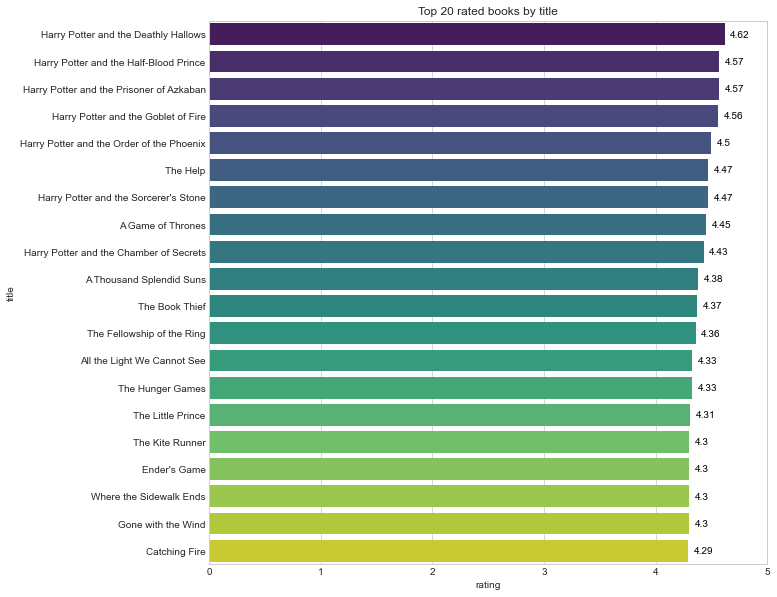

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
plt.xlim(0, 5)
plt.title("Top 20 rated books by title")
data = df_top_20.sort_values(by='rating', ascending=False).head(20)
gr = sns.barplot(x="rating", y="title", data=data, palette="viridis")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [8]:
df_filtered_by_votenum = df[df['numRatings'] > 20000]
df_filtered_by_votenum = df_filtered_by_votenum.drop(['likedPercent'], axis=1)
df_top_20_authors_most_rated = df_filtered_by_votenum[['author', 'rating']]
df_top_20_authors_most_rated = df_filtered_by_votenum.groupby('author').mean()
df_top_20_authors_most_rated['books_count'] = df_filtered_by_votenum.groupby('author')['title'].count()
df_top_20_authors_most_rated = df_top_20_authors_most_rated.sort_values(by='rating', ascending=False)

The most rated authors with books with num of ratings > 20000. 

In [9]:
df_top_20_authors_most_rated_with_min_books = df_top_20_authors_most_rated[df_top_20_authors_most_rated['books_count'] > 1]
df_top_20_authors_most_rated_with_min_books.sort_values(by='rating', ascending=False)
df_top_20_authors_most_rated_with_min_books.head(20)

,rating,numRatings,books_count
author,,,
Bill Watterson,4.695000,53223.000000,8
John Williams,4.550000,66796.000000,3
Alice Oseman (Goodreads Author),4.497500,36303.750000,4
Masashi Kishimoto,4.495000,91148.500000,2
Founding Fathers,4.490000,22594.000000,2
Kimberly Brubaker Bradley (Goodreads Author),4.490000,42028.500000,2
Jorge Luis Borges,4.465000,31987.750000,4
Alan Gratz,4.465000,27471.500000,2
Corrie ten Boom,4.460000,139423.500000,2


The most rated authors with books with num of ratings > 20000 and with a books number > 2. Books can be attributed to "Anonymous" for several reasons:

* They are officially published under that name
* They are traditional stories not attributed to a specific author
* They are religious texts not generally attributed to a specific author

In [10]:
df_less_40000 = df[df['numRatings'] < 40000]
df_3_4 = (df_less_40000[(df_less_40000['rating'] >= 3) & (df_less_40000['rating'] < 4)])

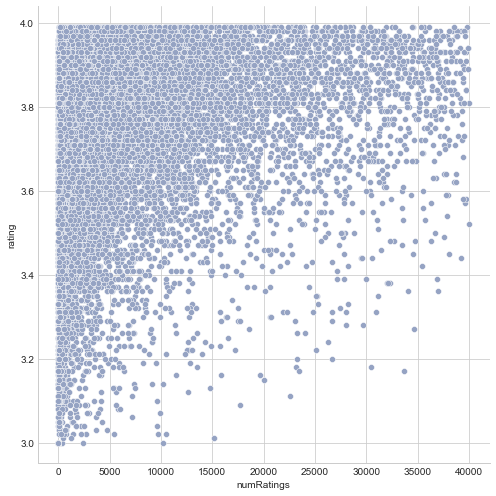

In [11]:
ax = sns.relplot(data=df_3_4,
                 x="numRatings",
                 y="rating",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o')

In [12]:
df_between_3_5 = (df[(df['rating'] > 3) & (df['numRatings'] > 20000)])

On choisit de recommander des livres avec une note supérieure à 3 pour recommender qui ont été aimé majoritairement et selection à plus de 20 000 car on voit qu'au dessus de 20 000 votes il y a plus des livres avec des notes proches de 4.

In [13]:
df_between_3_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7480 entries, 0 to 52401
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookId          7480 non-null   object 
 1   title           7480 non-null   object 
 2   author          7480 non-null   object 
 3   rating          7480 non-null   float64
 4   description     7458 non-null   object 
 5   language        7368 non-null   object 
 6   isbn            7480 non-null   object 
 7   genres          7480 non-null   object 
 8   characters      7480 non-null   object 
 9   bookFormat      7456 non-null   object 
 10  pages           7457 non-null   object 
 11  publishDate     7470 non-null   object 
 12  numRatings      7480 non-null   int64  
 13  ratingsByStars  7480 non-null   object 
 14  likedPercent    7480 non-null   float64
 15  coverImg        7478 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 993.4+ KB


Pour la recommendation on souhaite recommender des livres entre 3.5 et 5 en notes

In [14]:
df_between_3_5.genres.value_counts()
df_most_represented_genre = df_between_3_5

In [15]:
obj = {}
for i in df_most_represented_genre.genres:
    text = i.replace('[', '').replace(']', '').replace("'", '')
    text = text.split(', ')
    for j in range(len(text)):
        if text[j] in obj.keys():
            obj[text[j]] += 1
        else:
            obj[text[j]] = 1

In [16]:
genre_df = pd.DataFrame.from_dict(obj, orient='index',
                       columns=['Genres'])

genre_df = genre_df.reset_index().rename(columns={'index': 'Genres', 'Genres': 'Genre_occurence'})
genre_count = genre_df.Genre_occurence.sort_values(ascending=False)
sorted_categories = dict(sorted(obj.items(), key=lambda item: item[1], reverse=True))

In [17]:
sorted_categories

{'Fiction': 6189,
 'Fantasy': 2945,
 'Audiobook': 2821,
 'Romance': 2678,
 'Adult': 2416,
 'Young Adult': 2238,
 'Contemporary': 2007,
 'Mystery': 1739,
 'Classics': 1474,
 'Novels': 1455,
 'Adventure': 1407,
 'Historical Fiction': 1287,
 'Thriller': 1218,
 'Paranormal': 1068,
 'Historical': 1042,
 'Science Fiction': 1034,
 'Literature': 1017,
 'Adult Fiction': 1007,
 'Crime': 985,
 'Nonfiction': 985,
 'Mystery Thriller': 958,
 'Magic': 956,
 'Suspense': 928,
 'Chick Lit': 852,
 'Humor': 844,
 'Science Fiction Fantasy': 836,
 'Childrens': 822,
 'Urban Fantasy': 778,
 'Supernatural': 744,
 'Contemporary Romance': 637,
 'Middle Grade': 618,
 'Horror': 599,
 'Teen': 554,
 'Literary Fiction': 550,
 'Paranormal Romance': 537,
 'Drama': 517,
 'Realistic Fiction': 497,
 'Biography': 480,
 'New Adult': 464,
 'Vampires': 453,
 'High Fantasy': 450,
 'British Literature': 440,
 'Memoir': 412,
 'Dystopia': 401,
 'History': 397,
 'Philosophy': 368,
 'Young Adult Fantasy': 351,
 'School': 338,
 'Ame

Occurence des noms contenus dans le tableau genres 

In [18]:
labels = []
sizes = []
count = 0
for x, y in sorted_categories.items():
    if count <=9:
        labels.append(x)
        sizes.append(y)
        count +=1


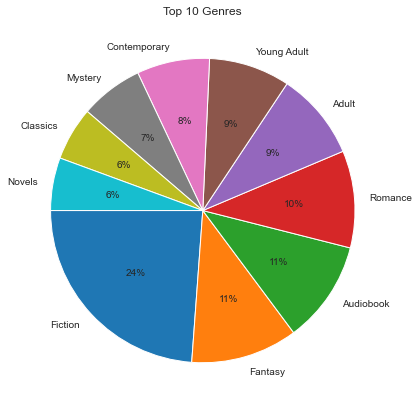

In [19]:
plt.figure(figsize=(15,7))
plt.title("Top 10 Genres")
plt.pie(sizes, labels=labels, wedgeprops= {'edgecolor':'white'}, autopct='%1.0f%%', startangle=180);


Réprésentation du % de chaque genre avec comme genre dominant la fiction

In [20]:
#list of different genres
fiction_genre = ['Fiction', 'Realistic Fiction', 'Adult Fiction', 'Fan Fiction', 'Novels', 'Supernatural', 'Recreation']
fantasy_genre = ['Fantasy', 'Urban Fantasy', 'Lds Fiction', 'American Fiction', 'High Fantasy', 'Adolescence', 'Faith', 'Epic Fantasy', 'Magic', 'Magical Realism', 'High Fantasy', 'Wizards', 'Epic Fantasy', 'Fairy Tale', 'Quest', 'Fantasy Fiction', 'Vampires']
self_genre= ['Self Help', 'Taoism']
thriller_genre = ['Thriller', 'Paranormal Mystery', 'Mystery Thriller', 'Detective', 'Adventure', 'Psychological Thriller', 'Suspense']
romance_genre = ['Romance', 'Historical Romance', 'Time Travel Romance', 'Erotic Historical Romance', 'Category Romance', 'Victorian Romance', 'Love', 'Contemporary Romance', 'M F Romance']
war_genre = ['Action', 'Civil War', 'War', 'World War II', 'Soldiers', 'Zombies', 'Military Fiction', 'Military Science Fiction']
tech_genre = ['Personal Finance', 'Taxation', 'Banking', 'Programming', 'Software', 'Coding', 'Internet','Computer Science', 'Business', 'Technology']
env_genre =['Global Warming', 'Climate Change Fiction', 'Environment', 'Sustainability']
health_genre = ['Health', 'Psychiatry', 'Psychology']
food_genre = ['Food', 'Food History', 'Cookbooks']
politics_genre =['International Relations', 'Politics']
comedy_genre =['Comics', 'Jokes', 'Comedy', 'Humor']
literature_genre = ['Literature']
horror_genre =['Erotic Horror', 'Ghost Stories', 'Horror']
nonfiction_genre = ['Logic', 'Philosophy','Nonfiction']
erotic_genre =['Erotica', 'Erotic Historical Romance', 'Erotic Paranormal Romance']            
science_genre =['Science Fiction']

In [21]:
df_test_genre = df_between_3_5

In [22]:
df_test_genre.genres = df_test_genre.genres.apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').replace(",","").strip().split())

/Users/thor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
def check_genres(index):
    return {
        'fiction' : list(np.isin(index, fiction_genre)),
        'fantasy' : list(np.isin(index, fantasy_genre)),
        'self' : list(np.isin(index,self_genre)),
        'thriller' : list(np.isin(index,thriller_genre)),
        'romance' : list(np.isin(index,romance_genre)),
        'war' : list(np.isin(index,war_genre)),
        'tech' : list(np.isin(index,tech_genre)),
        'environment' : list(np.isin(index,env_genre)),
        'health' : list(np.isin(index,health_genre)),
        'food' : list(np.isin(index,food_genre)),
        'politics' : list(np.isin(index,politics_genre)),
        'comedy' : list(np.isin(index,comedy_genre)),
        'literature' : list(np.isin(index,literature_genre)),
        'horror' : list(np.isin(index,horror_genre)),
        'nonfiction' : list(np.isin(index,nonfiction_genre)),
        'erotic' : list(np.isin(index,erotic_genre)),
        'science' : list(np.isin(index,science_genre))
    }

In [24]:
for index, value in df_test_genre.genres.iteritems():
    percentage_presence = {}
    notes = []
    present_values = check_genres(value)
    for key, value in present_values.items():
        try:
            percentage_presence.update({key : value.count(True)/len(value)})
            notes.append(value.count(True)/len(value))
        except ZeroDivisionError:
            continue
    for k, v in percentage_presence.items():
        if max(notes) == v:
            genre = k
    df_test_genre.genres.at[index] = genre

/Users/thor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)


On a remplacé les listes de genres par un seul genre en prenant le pourcentage de présence des mots dans la nouvelle liste de genre

In [25]:
final_genre_count = df_test_genre.genres.value_counts()

In [26]:
final_genre_count

fiction        2570
fantasy        1435
thriller       1013
romance         872
nonfiction      790
comedy          308
literature      277
war              88
health           51
horror           35
food             23
tech             14
environment       4
Name: genres, dtype: int64

Occurence des genres après modification

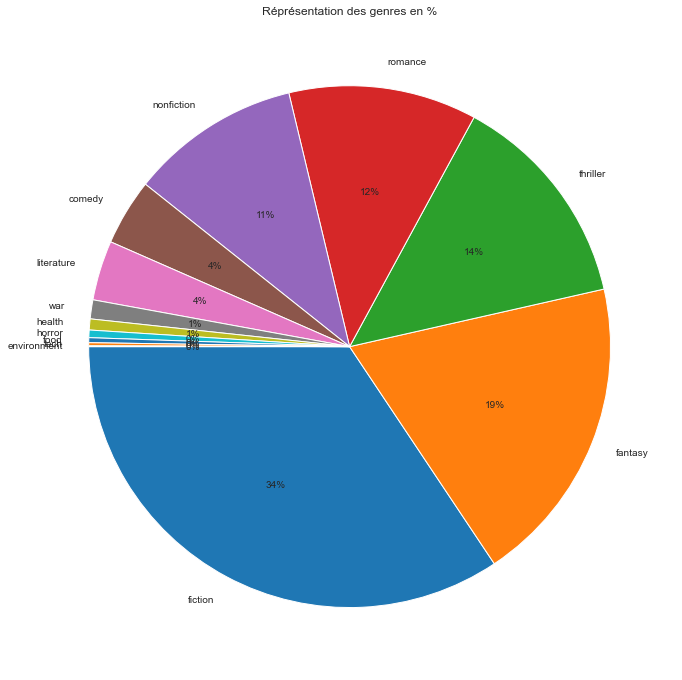

In [27]:
plt.figure(figsize=(20,12))
plt.title("Réprésentation des genres en %")
plt.pie(final_genre_count, labels=final_genre_count.index, wedgeprops= {'edgecolor':'white'}, autopct='%1.0f%%', startangle=180);


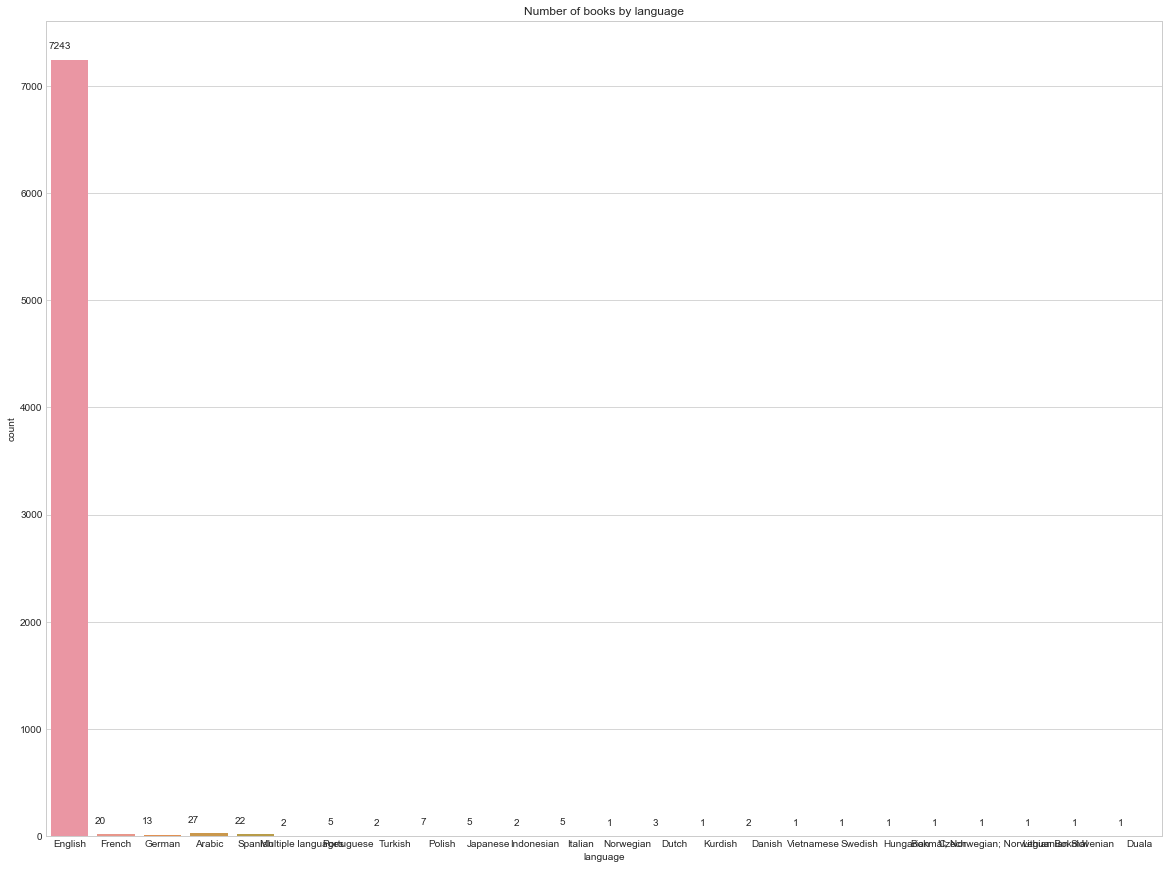

In [28]:
plt.figure(figsize=(20, 15))
plt.title('Number of books by language')
ax = sns.countplot(x='language', data=df_test_genre)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

In [29]:
only_english_books = df_test_genre[df_test_genre['language'] == 'English']

In [30]:
only_english_books.columns

Index(['bookId', 'title', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'bookFormat', 'pages', 'publishDate',
       'numRatings', 'ratingsByStars', 'likedPercent', 'coverImg'],
      dtype='object')

<AxesSubplot:>

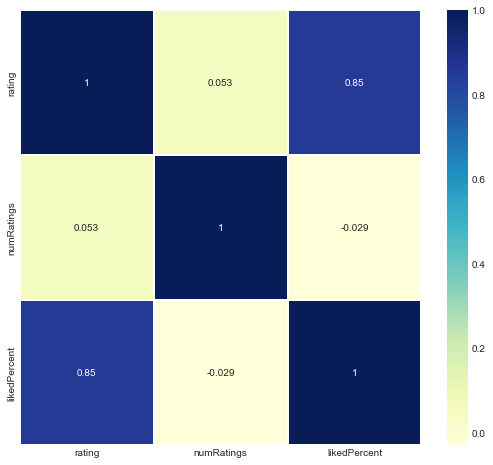

In [31]:
corrmat = only_english_books.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 


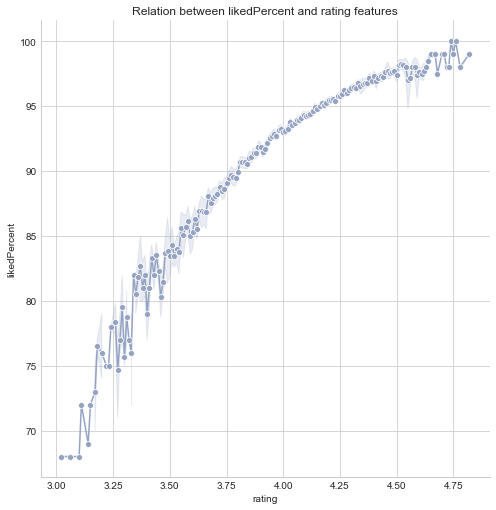

In [32]:
ax = sns.relplot(data=only_english_books,
                 x="rating",
                 y="likedPercent",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o', kind="line").set(title='Relation between likedPercent and rating features')

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = only_english_books
polynomial_features= PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
x_poly = polynomial_features.fit_transform(only_english_books[['rating','likedPercent']])

In [34]:
x_poly

array([[  4.33,  96.  , 415.68],
       [  4.5 ,  98.  , 441.  ],
       [  4.28,  95.  , 406.6 ],
       ...,
       [  3.5 ,  87.  , 304.5 ],
       [  4.04,  95.  , 383.8 ],
       [  4.17,  96.  , 400.32]])

<AxesSubplot:>

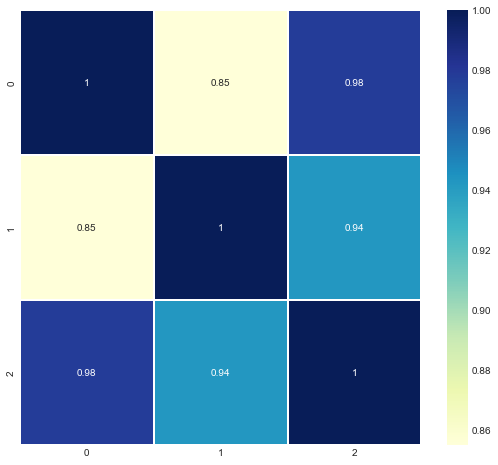

In [35]:
x_poly = pd.DataFrame(x_poly)
corrmat = x_poly.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 

In [36]:
x_poly

,0,1,2
0,4.33,96.0,415.68
1,4.50,98.0,441.00
2,4.28,95.0,406.60
3,4.26,94.0,400.44
4,3.60,78.0,280.80
...,...,...,...
7238,4.23,95.0,401.85
7239,3.76,92.0,345.92
7240,3.50,87.0,304.50
7241,4.04,95.0,383.80


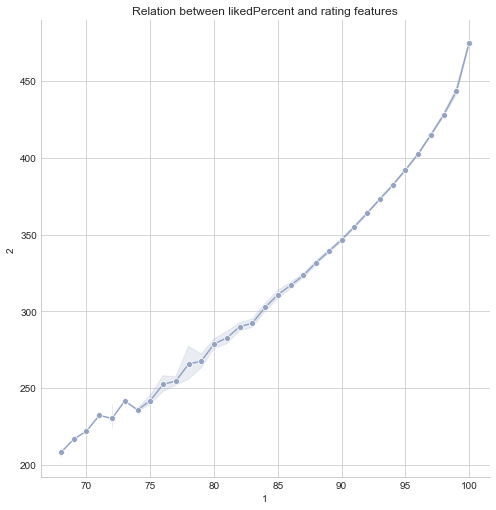

In [37]:
ax = sns.relplot(
                 x=x_poly[1],
                 y=x_poly[2],
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o', kind="line").set(title='Relation between likedPercent and rating features')

### Avoid Multicollinearity
To avoid Multicollinearity we just select rating feature. Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

/Users/thor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

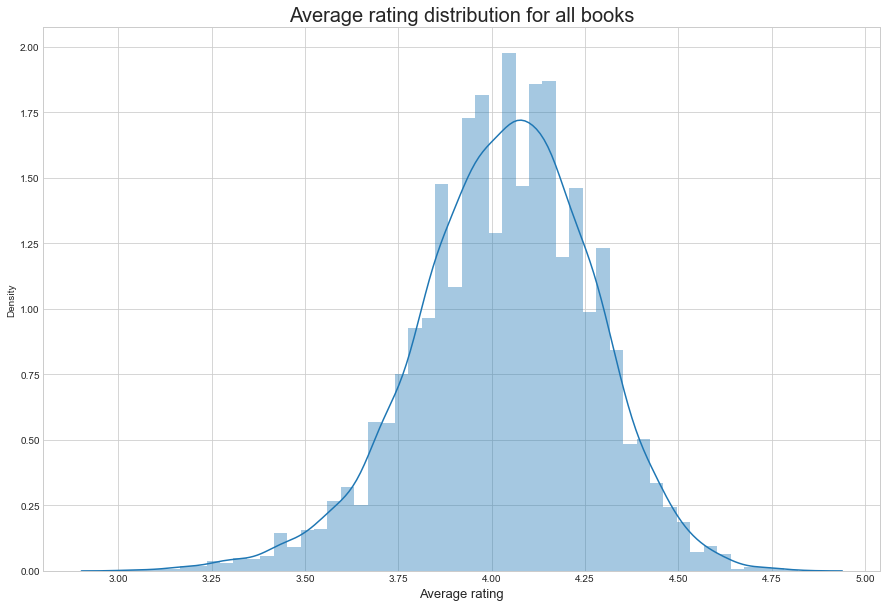

In [38]:
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(only_english_books['rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

It almost follow gaussian distributions curve. so, it is very good for model training.

In [39]:
only_english_books = only_english_books.drop(['bookId'], axis=1)
only_english_books = only_english_books.reset_index(drop=True)

In [40]:
df_copy =only_english_books.copy()

In [41]:
df_copy = df_copy.drop(['bookFormat', 'characters', 'pages', 'publishDate', 'ratingsByStars'], axis=1)


In [42]:
genre_df_dummies = pd.get_dummies(df_copy['genres'])

In [43]:
features = pd.concat([genre_df_dummies, df_copy['rating'], df_copy['numRatings']], axis=1)
features.head()

,comedy,environment,fantasy,fiction,food,health,horror,literature,nonfiction,romance,tech,thriller,war,rating,numRatings
0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.33,6376780
1,0,0,1,0,0,0,0,0,0,0,0,0,0,4.50,2507623
2,0,0,0,1,0,0,0,0,0,0,0,0,0,4.28,4501075
3,0,0,0,1,0,0,0,0,0,0,0,0,0,4.26,2998241
4,0,0,1,0,0,0,0,0,0,0,0,0,0,3.60,4964519


In [44]:
features.columns

Index(['comedy', 'environment', 'fantasy', 'fiction', 'food', 'health',
       'horror', 'literature', 'nonfiction', 'romance', 'tech', 'thriller',
       'war', 'rating', 'numRatings'],
      dtype='object')

## Model Selection

In [45]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [46]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [47]:
X = features

In [48]:
df_kmeans = pd.DataFrame(X, columns = ['comedy', 'environment', 'fantasy', 'fiction', 'health', 'horror',
       'literature', 'nonfiction', 'romance', 'tech', 'food', 'thriller', 'war',
       'rating', 'numRatings'])

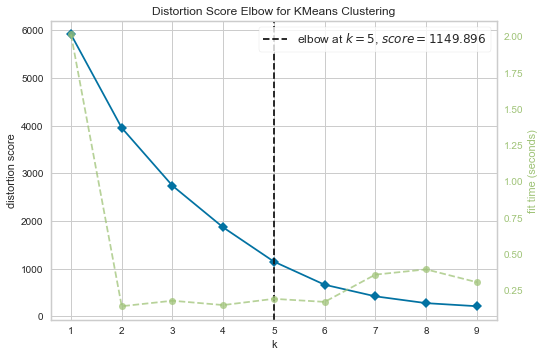

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()   



Le score d'inertie est optimisé lorsqu'il arrive à 6 clusters

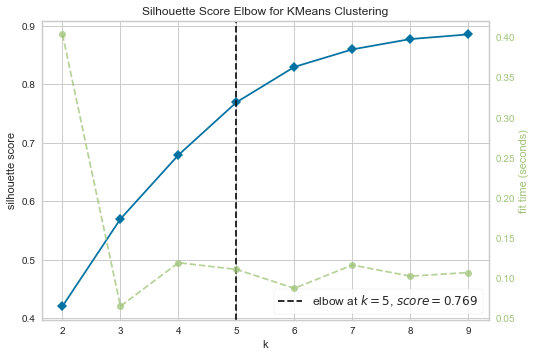

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()   


In [51]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [52]:
df_kmeans['category'] = kmeans.predict(X)
df_kmeans.head()

,comedy,environment,fantasy,fiction,health,horror,literature,nonfiction,romance,tech,food,thriller,war,rating,numRatings,category
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727778,0.904433,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822222,0.353935,2
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700000,0.637560,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.688889,0.423739,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322222,0.703498,2


In [53]:
df_copy['category'] = df_kmeans.category

In [54]:
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(df_kmeans)
dist, idlist = model.kneighbors(df_kmeans)

In [55]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_list_id = []
    book_id = df_copy[df_copy['title'].str.contains(book_name, case=False)].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df_copy.loc[newid].title)
#     return book_list_name
    return df_copy.iloc[idlist[book_id]]


In [56]:
book_list_name = book_recommendation_engine('American Sniper: The Autobiography of the Most Lethal Sniper in U.S. Military History')
book_list_name

,title,author,rating,description,language,isbn,genres,numRatings,likedPercent,coverImg,category
2945,American Sniper: The Autobiography of the Most...,Chris Kyle,4.00,"From 1999 to 2009, U.S. Navy SEAL Chris Kyle r...",English,9780062107060,nonfiction,110501,91.0,https://i.gr-assets.com/images/S/compressed.ph...,4
6015,Benjamin Franklin: An American Life,Walter Isaacson (Goodreads Author),4.00,Benjamin Franklin is the Founding Father who w...,English,9780743258074,nonfiction,113854,91.0,https://i.gr-assets.com/images/S/compressed.ph...,4
4739,The War of Art: Break Through the Blocks & Win...,Steven Pressfield (Goodreads Author),4.00,Internationally bestselling author of Last of ...,English,9780446691437,nonfiction,72969,90.0,https://i.gr-assets.com/images/S/compressed.ph...,4
1943,The Tao of Pooh,Benjamin Hoff,3.99,The Wisdom of Pooh.Is there such thing as a We...,English,9781405204262,nonfiction,101520,92.0,https://i.gr-assets.com/images/S/compressed.ph...,4
5208,"SuperFreakonomics: Global Cooling, Patriotic P...",Steven D. Levitt,3.99,The New York Times best-selling Freakonomics w...,English,9780060889579,nonfiction,121251,94.0,https://i.gr-assets.com/images/S/compressed.ph...,4
3260,Getting Things Done: The Art of Stress-Free Pr...,David Allen,3.99,"In today's world, yesterday's methods just don...",English,9780142000281,nonfiction,128554,91.0,https://i.gr-assets.com/images/S/compressed.ph...,4
1402,Beyond Good and Evil,Friedrich Nietzsche,4.00,Friedrich Nietzsche's Beyond Good and Evil is ...,English,9780140449235,nonfiction,66727,92.0,https://i.gr-assets.com/images/S/compressed.ph...,4
3533,Under the Banner of Heaven,Jon Krakauer (Goodreads Author),4.00,"A Story of Violent FaithA multilayered, bone-c...",English,9780330419123,nonfiction,156956,94.0,https://i.gr-assets.com/images/S/compressed.ph...,4
1332,The Diving Bell and the Butterfly,Jean-Dominique Bauby,4.00,‘Locked-in syndrome: paralysed from head to to...,English,9780375701214,nonfiction,59577,93.0,https://i.gr-assets.com/images/S/compressed.ph...,4
4940,Escape from Camp 14: One Man's Remarkable Odys...,Blaine Harden (Goodreads Author),4.00,"A New York Times bestseller, the shocking stor...",English,9780670023325,nonfiction,58150,95.0,https://i.gr-assets.com/images/S/compressed.ph...,4


In [63]:
df_copy = df_copy.reset_index().rename(columns={'index': 'id'})
df_copy.to_csv('./books_db.csv', index=False)

,id,title,author,rating,description,language,isbn,genres,numRatings,likedPercent,coverImg,category
0,0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,fiction,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,1
1,1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,fantasy,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,2
2,2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,fiction,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,1
3,3,Pride and Prejudice,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,fiction,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,1
4,4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,fantasy,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7238,7238,The Complete Adventures of Curious George,Margret Rey,4.23,“This is George. He lived in Africa. He was a ...,English,9780618164417,comedy,44034,95.0,https://i.gr-assets.com/images/S/compressed.ph...,4
7239,7239,Shakespeare's Landlord,Charlaine Harris (Goodreads Author),3.76,"Welcome to Shakespeare, Arkansas. Lily Bard ca...",English,9780425206867,thriller,25143,92.0,https://i.gr-assets.com/images/S/compressed.ph...,3
7240,7240,When We Were Orphans,Kazuo Ishiguro,3.50,"From the Booker Prize-winning, bestselling aut...",English,9780375724404,fiction,27511,87.0,https://i.gr-assets.com/images/S/compressed.ph...,1
7241,7241,See Jane Score,Rachel Gibson (Goodreads Author),4.04,\n This is Jane\nA little subdued. A little s...,English,9780060009243,romance,24431,95.0,https://i.gr-assets.com/images/S/compressed.ph...,0
